## EDA-1: Bike


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("bike details.csv.csv")
df.shape
df.head()



name  selling_price  year seller_type  \
0            Royal Enfield Classic 350         175000  2019  Individual   
1                            Honda Dio          45000  2017  Individual   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                Yamaha SZ [2013-2014]          20000  2011  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner      12000           148114.0  
3  1st owner      23000            89643.0  
4  2nd owner      21000                NaN

In [13]:
#Q1: What is the range of selling prices in the dataset?

df["selling_price"]=pd.to_numeric(df["selling_price"],errors="coerce")
price_range=df["selling_price"].max()-df["selling_price"].min()
print(f"the range of selling price is :{price_range}")

the range of selling price is :755000


In [14]:
#Q2: What is the median selling price for bikes in the dataset?
df.selling_price.median()

45000.0

In [19]:
#Q3: What is the most common seller type?

df.seller_type.unique()
df.seller_type.value_counts(normalize=True)*100

seller_type
Individual    99.434496
Dealer         0.565504
Name: proportion, dtype: float64

In [22]:
#Q4: How many bikes have driven more than 50,000 kilometers?

df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
bikes_over_50k = df[df['km_driven'] > 50000]

count_bikes_over_50k = bikes_over_50k.shape[0]
print(f"Number of bikes driven more than 50,000 kilometers: {count_bikes_over_50k}")


Number of bikes driven more than 50,000 kilometers: 170


In [24]:
#Q5: What is the average km_driven value for each ownership type?
df["km_driven"]=pd.to_numeric(df["km_driven"],errors="coerce")
avg_km_driven_owner=df.groupby("owner")['km_driven'].mean()
avg_km_driven_owner

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [33]:
#Q6:What proportion of bikes are from the year 2015 or older?
df['year']=pd.to_numeric(df['year'],errors='coerce')
bikes_2015=df[df['year']<=2015]
proportion_11=len(bikes_2015)/len(df)
proportion_11
print(f'the proportion of bikes older than 2015 is {proportion_11*100} percentage')

the proportion of bikes older than 2015 is 56.64467483506126 percentage


Missing Values Count:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing Values Percentage:
0.6597549481621112


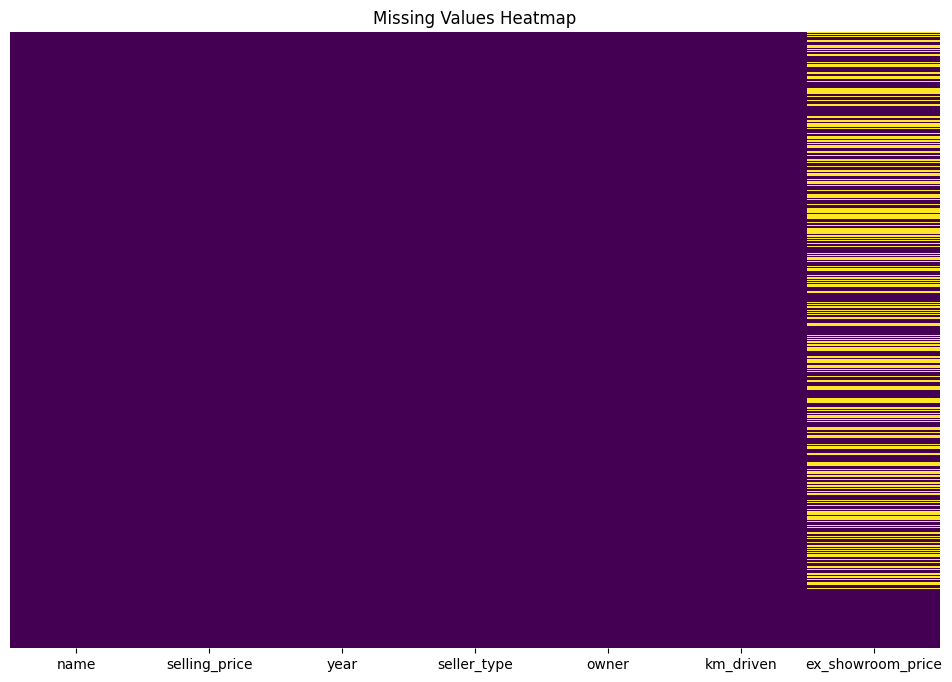

In [45]:
#Q7: What is the trend of missing values across the dataset?
missing_values = df.isnull().sum()
missing_per= (len(missing_values)/len(df)*100)
print("Missing Values Count:")
print(missing_values)
print("\nMissing Values Percentage:")
print(missing_per)


plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


In [53]:
#Q8: What is the highest ex_showroom_price recorded, and for which bike?

df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')


max_price_row = df.loc[df['ex_showroom_price'].idxmax()]


highest_price = max_price_row['ex_showroom_price']
bike_details = max_price_row


print(f"The highest ex-showroom price recorded is {highest_price} for the bike:")
print(bike_details)

The highest ex-showroom price recorded is 1278000.0 for the bike:
name                 Harley-Davidson Street Bob
selling_price                            750000
year                                       2013
seller_type                          Individual
owner                                 2nd owner
km_driven                                 12000
ex_showroom_price                     1278000.0
Name: 134, dtype: object


In [54]:
#Q9: What is the total number of bikes listed by each seller type?
df.seller_type.value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [56]:
#Q10:What is the relationship between selling_price and km_driven for first-owner bikes?
df_first_owner=df[df['owner']=='1st owner']
df_first_owner['selling_price']=pd.to_numeric(df_first_owner['selling_price'],errors='coerce')
df_first_owner['km_deiven']=pd.to_numeric(df_first_owner['km_driven'],errors='coerce')

correlation=df_first_owner[['selling_price','km_driven']].corr()
print('the relation between selling_price and km_driven for 1st bike owner:')
print(correlation)

the relation between selling_price and km_driven for 1st bike owner:
               selling_price  km_driven
selling_price       1.000000  -0.243482
km_driven          -0.243482   1.000000


In [57]:
#Q11:  Identify and remove outliers in the km_driven column using the IQR method

df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

print(f"Rows before removing outliers: {len(df)}")
print(f"Rows after removing outliers: {len(df_no_outliers)}")


Rows before removing outliers: 1061
Rows after removing outliers: 1022


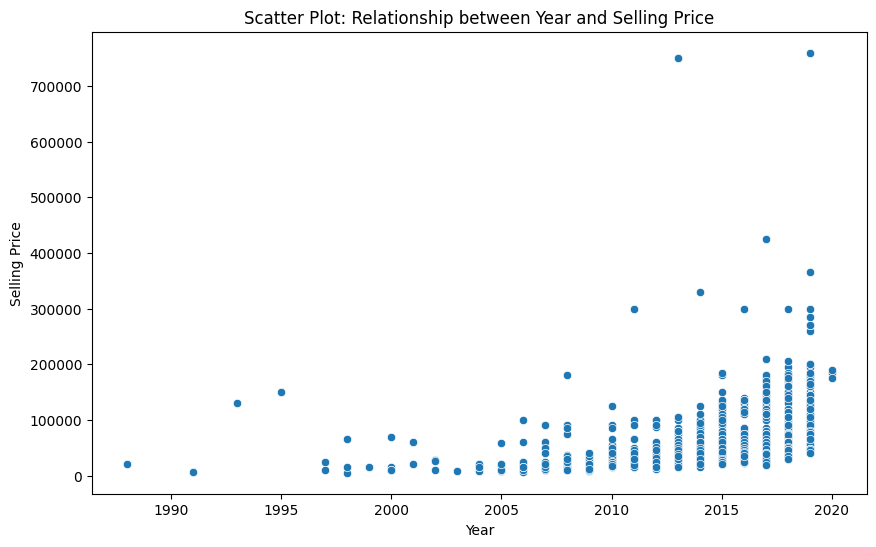

In [59]:
#Q12:Perform a bivariate analysis to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Scatter Plot: Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [60]:
#Q13: What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)

current_year = 2025

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

df['bike_age'] = current_year - df['year']

df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

average_depreciation_by_age = df.groupby('bike_age')['depreciation'].mean()
print(average_depreciation_by_age)


bike_age
5    -34260.000000
6      2954.562500
7     13023.194805
8     22306.082353
9     28328.190476
10    28013.275000
11    34505.606061
12    43086.886792
13    37317.648649
14    47102.666667
15    45658.928571
16    38227.785714
17    54732.428571
18    42399.000000
19    39664.500000
20    44852.000000
21    36852.000000
22             NaN
23             NaN
24    34852.000000
25             NaN
26             NaN
27             NaN
28             NaN
30             NaN
32             NaN
34             NaN
37             NaN
Name: depreciation, dtype: float64


In [ ]:
#Q14: Which bike names are priced significantly above the average price for their manufacturing year?



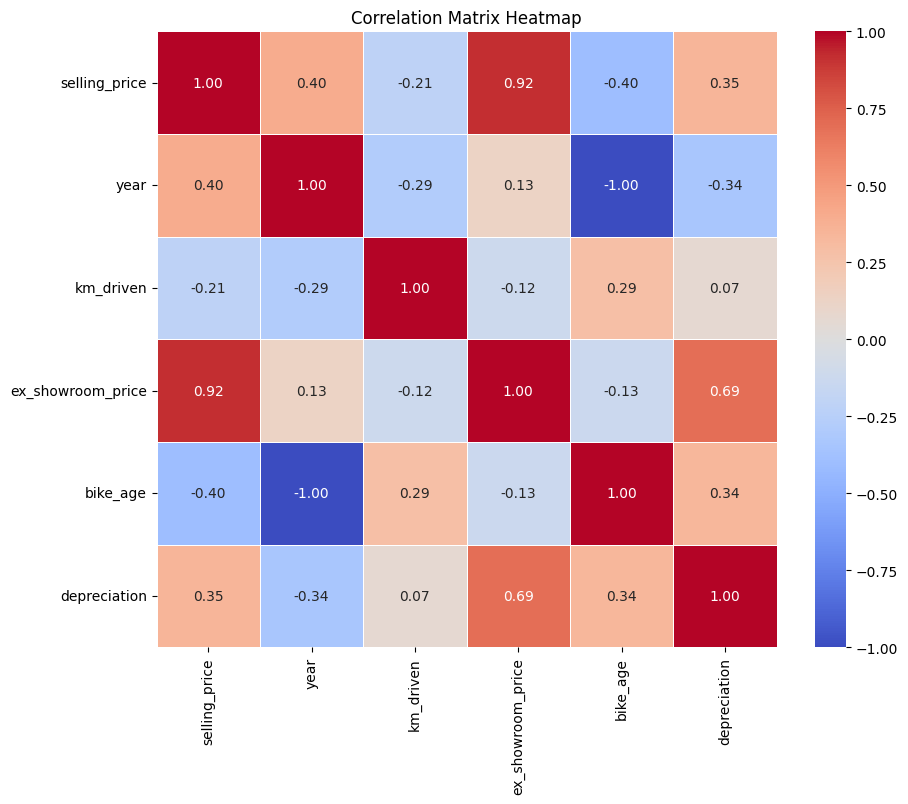

In [61]:
#Q15: Develop a correlation matrix for numeric columns and visualize it using a heatmap

numeric_columns = df.select_dtypes(include=['number']).columns

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


## EDA-2 CAR SALES

In [64]:
 df=pd.read_csv('Car Sale.csv')
pd.DataFrame(df)

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

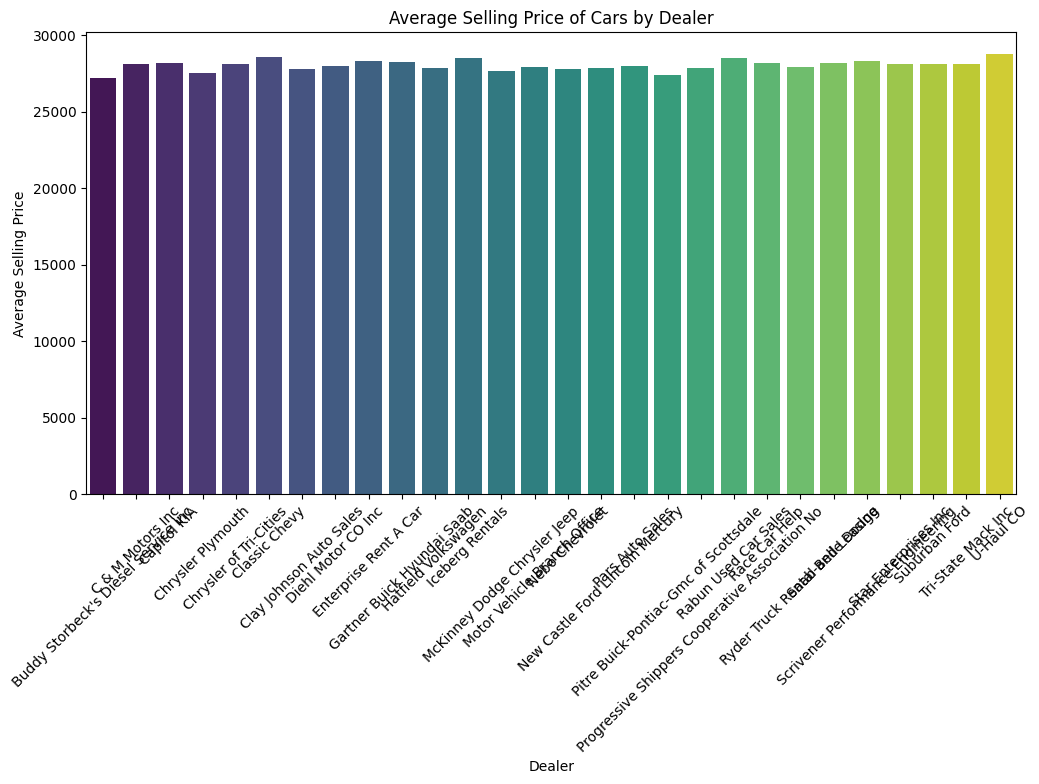

In [67]:
#Q1: What is the average selling price of cars for each dealer, and how does it compare across different dealers?
avg_sell_price_dealer=df.groupby('Dealer_Name')['Price ($)'].mean()
avg_sell_price_dealer

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_sell_price_dealer.index, y=avg_sell_price_dealer.values, palette='viridis')

plt.title('Average Selling Price of Cars by Dealer')
plt.xlabel('Dealer')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45)
plt.show()

In [71]:
#Q2: Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
high_variation_brand=df.groupby('Company')['Price ($)'].std()
max_variation_brand=high_variation_brand.idxmax()
max_variation_value=high_variation_brand.max()

print(f'the car brand with high variation prices is :{max_variation_brand}')
print(f'the standard deviation of prices for {max_variation_brand} is: {max_variation_value}')


the car brand with high variation prices is :Lincoln
the standard deviation of prices for Lincoln is: 19658.050211265567


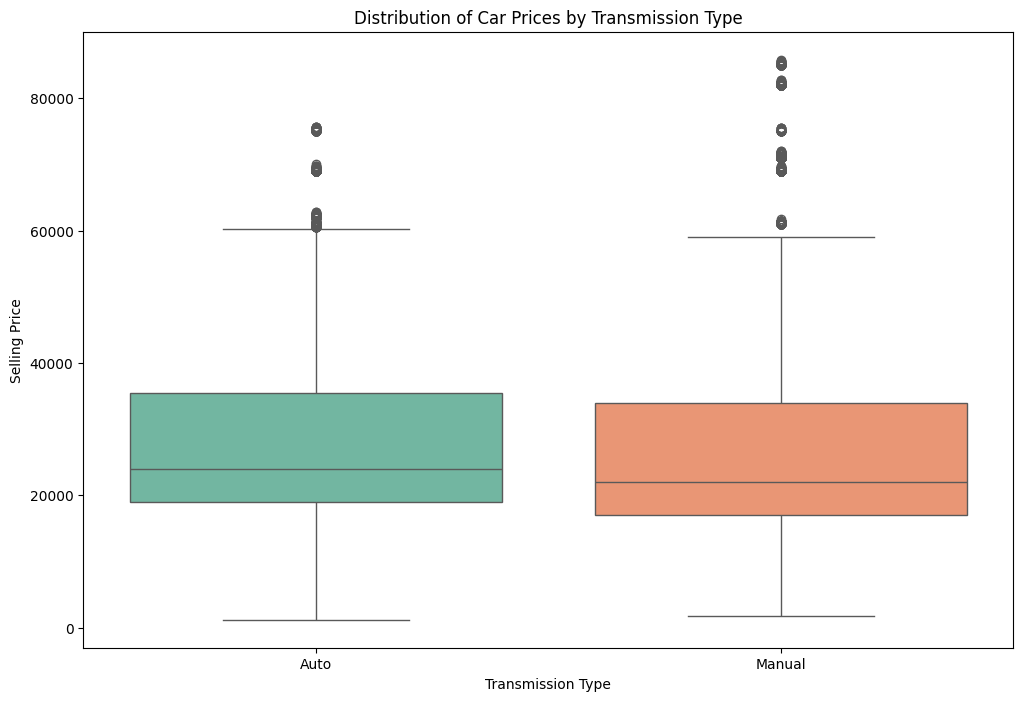

                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


In [83]:
#Q3: What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
df['Price ($)']=pd.to_numeric(df['Price ($)'],errors='coerce')
df['Transmission']=df['Transmission'].astype('category')

plt.figure(figsize=(12,8))
sns.boxplot(x='Transmission',y='Price ($)',data=df,palette='Set2')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()


iqr_by_transmission=df.groupby('Transmission')['Price ($)'].quantile([0.25,0.75]).unstack()
iqr_by_transmission['IQR']=iqr_by_transmission[0.75] - iqr_by_transmission[0.25]
print(iqr_by_transmission[['IQR']])

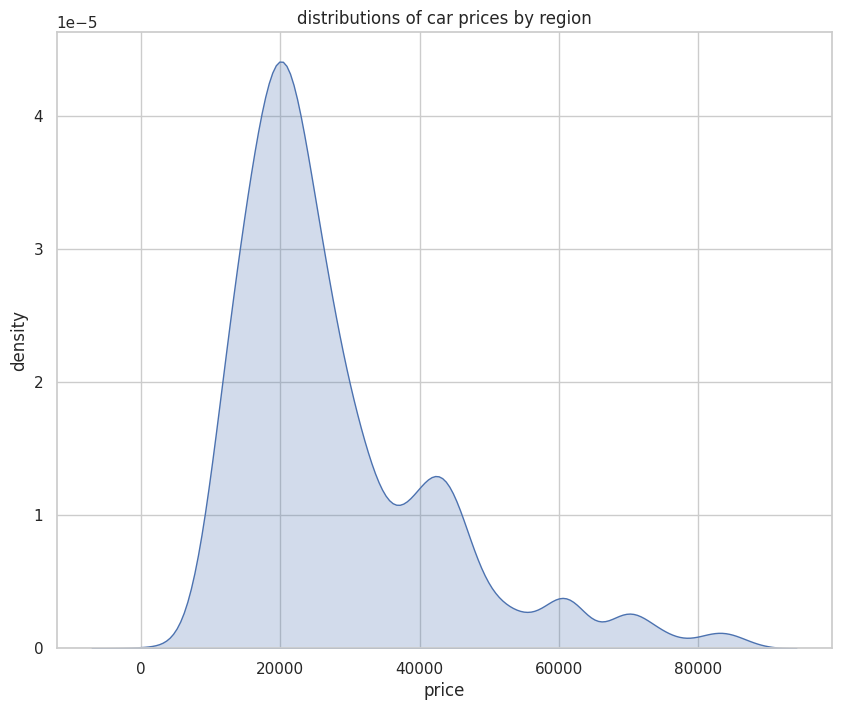

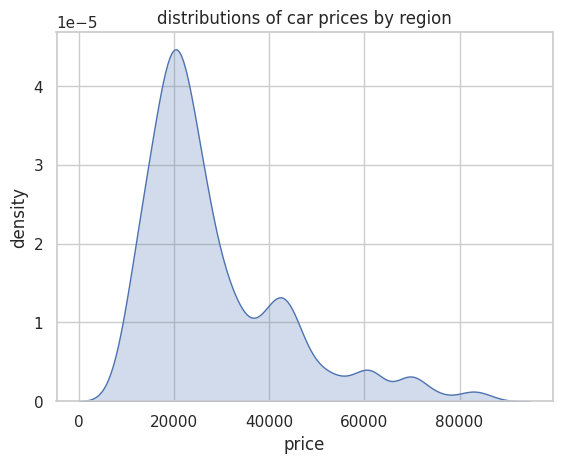

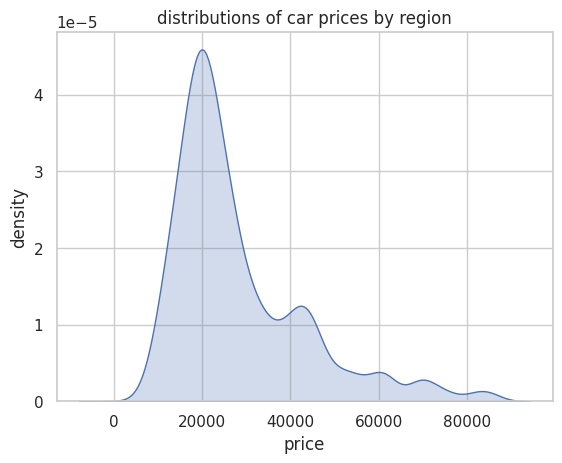

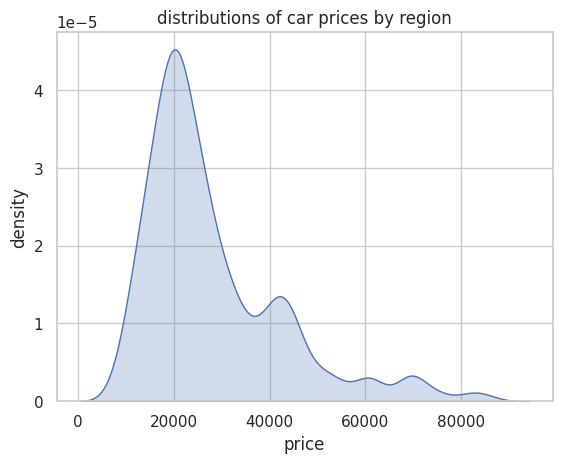

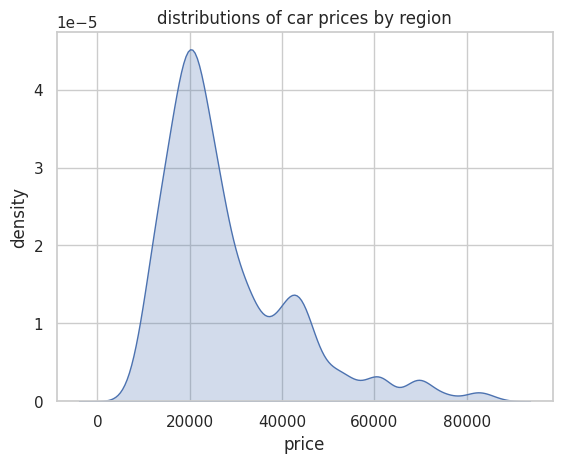

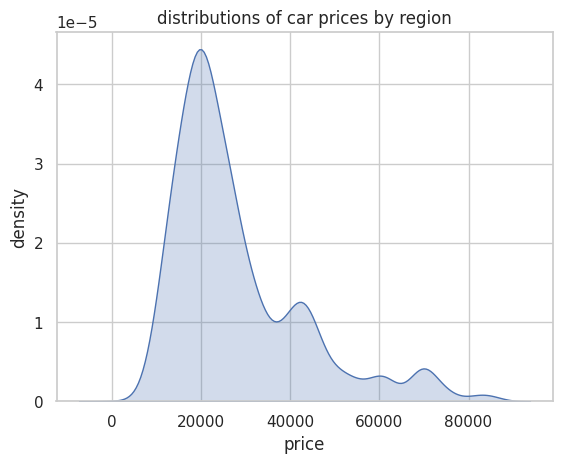

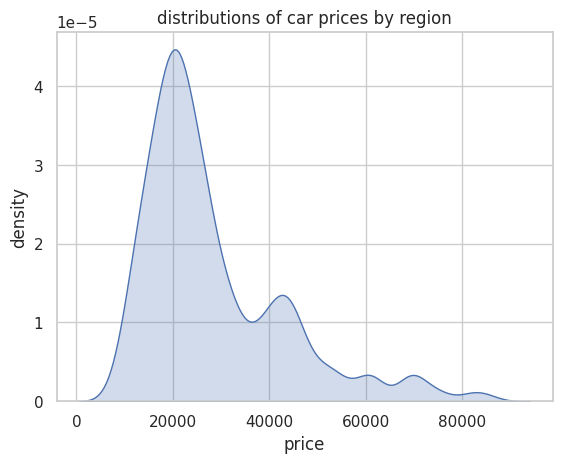

In [88]:
#Q4: What is the distribution of car prices across different regions?
df['Price ($)']=pd.to_numeric(df['Price ($)'],errors='coerce')
df['Dealer_Region']=df['Dealer_Region'].astype('category')

plt.figure(figsize=(10,8))
sns.set(style='whitegrid')
for region in df['Dealer_Region'].unique():
  sns.kdeplot(df[df['Dealer_Region']==region]['Price ($)'],label=region,shade=True)
  plt.title('distributions of car prices by region')
  plt.xlabel('price')
  plt.ylabel('density')
  plt.show()

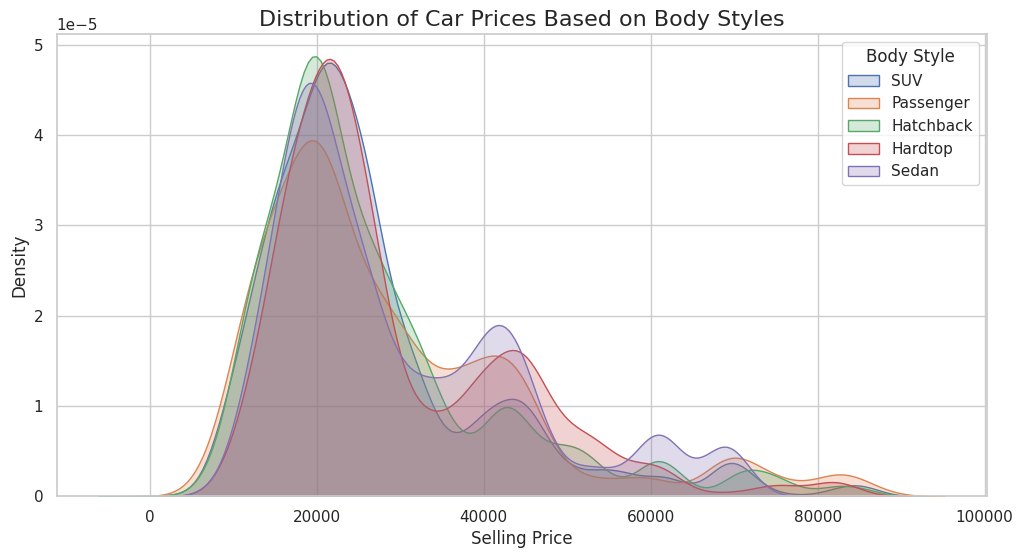

In [89]:
#Q5: What is the distribution of cars based on body styles?

df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Body Style'] = df['Body Style'].astype('category')


plt.figure(figsize=(12, 6))


sns.set(style="whitegrid")
for body_style in df['Body Style'].unique():
    sns.kdeplot(df[df['Body Style'] == body_style]['Price ($)'], label=body_style, shade=True)


plt.title('Distribution of Car Prices Based on Body Styles', fontsize=16)
plt.xlabel('Selling Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Body Style', loc='upper right')

plt.show()


In [94]:
#Q6: How does the average selling price of cars vary by customer gender and annual income?
df.columns
df['Annual Income']=pd.to_numeric(df['Annual Income'],errors='coerce')
df['Price ($)']=pd.to_numeric(df['Price ($)'],errors='coerce')

avg_selling_price=df.groupby(['Gender','Annual Income'])['Price ($)'].mean().reset_index()
avg_selling_price.value_counts()

Gender  Annual Income  Price ($)   
Male    11200000       26001.000000    1
Female  13500          28132.038732    1
Male    5450000        31001.000000    1
        5410000        24001.000000    1
        5355000        20501.000000    1
                                      ..
Female  240000         39000.000000    1
        238000         22001.000000    1
        211000         51000.000000    1
        190000         19001.000000    1
        121000         20000.000000    1
Name: count, Length: 3442, dtype: int64

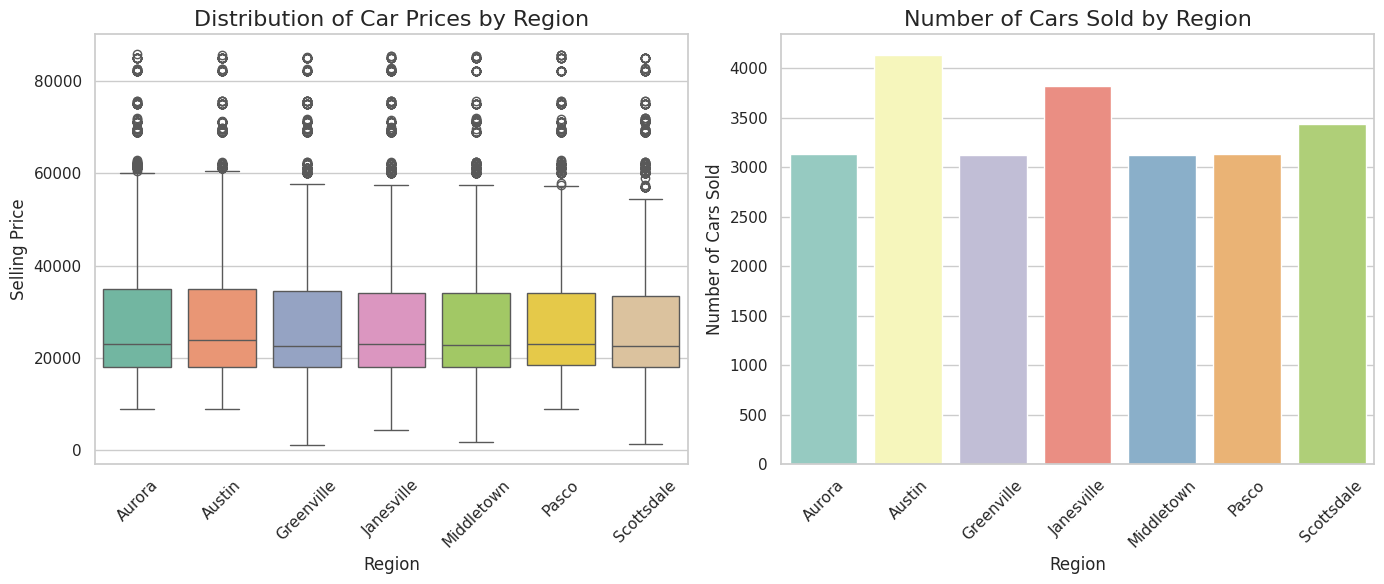

In [96]:
#Q7: What is the distribution of car prices by region, and how does the number of cars sold vary by region?

df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Dealer_Region'] = df['Dealer_Region'].astype('category')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set2')
plt.title('Distribution of Car Prices by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
car_sales_by_region = df['Dealer_Region'].value_counts()
sns.barplot(x=car_sales_by_region.index, y=car_sales_by_region.values, palette='Set3')
plt.title('Number of Cars Sold by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Cars Sold', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [97]:
#Q8: How does the average car price differ between cars with different engine sizes?
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

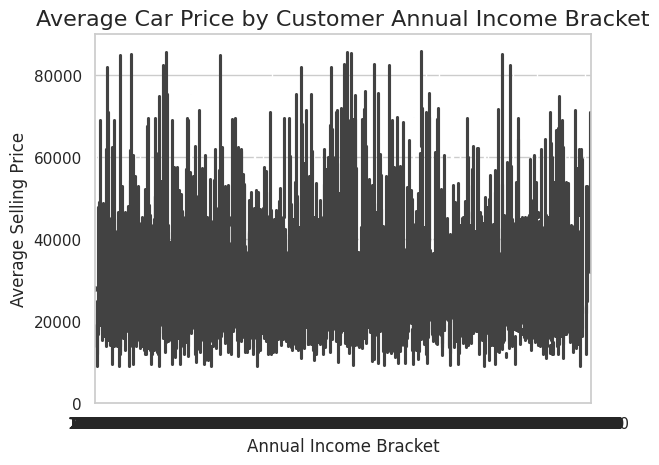

In [104]:
#Q9:How do car prices vary based on the customer’s annual income bracket?
df['Annual Income']=pd.to_numeric(df['Annual Income'],errors='coerce')
df['Price ($)']=pd.to_numeric(df['Price ($)'],errors='coerce')
avg_price_by_income = df.groupby('Annual Income')['Price ($)'].mean().reset_index()

sns.barplot(x='Annual Income', y='Price ($)', data=df, palette='viridis')
plt.title('Average Car Price by Customer Annual Income Bracket', fontsize=16)
plt.xlabel('Annual Income Bracket', fontsize=12)
plt.ylabel('Average Selling Price', fontsize=12)

plt.show()


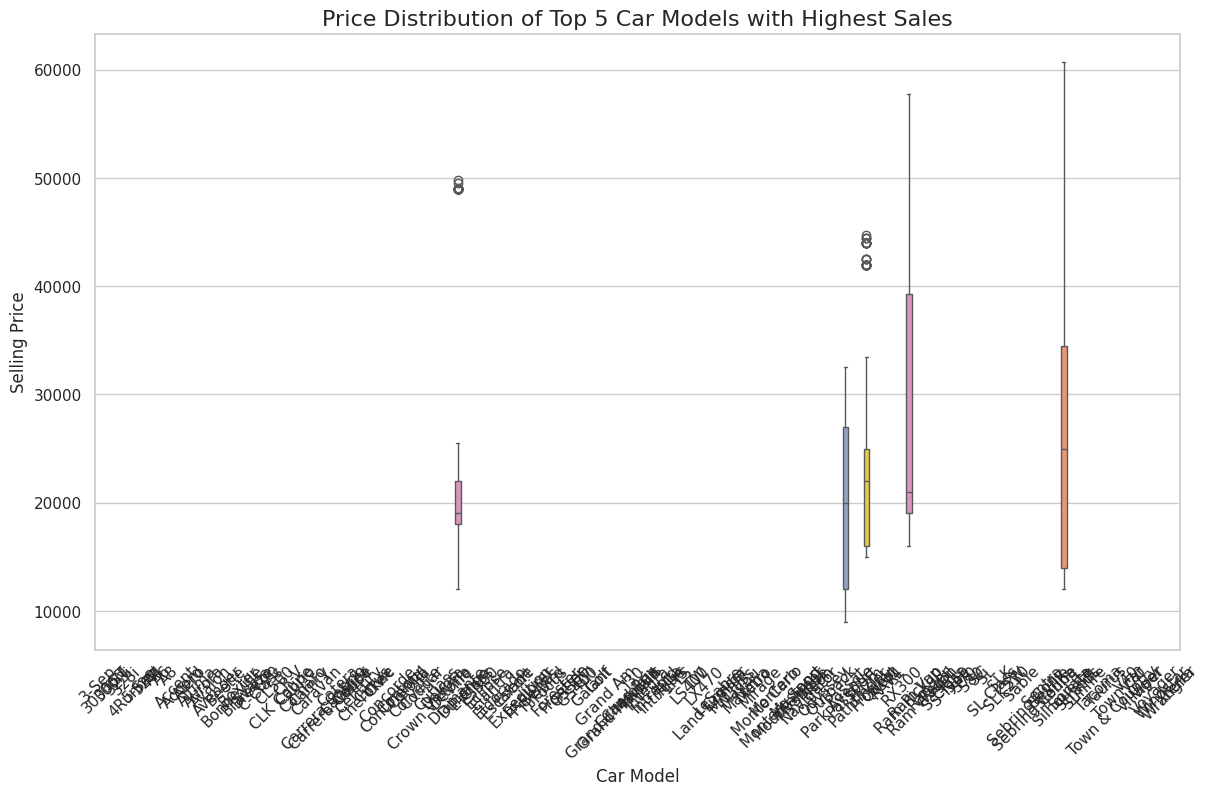

In [106]:
#Q10: What are the top 5 car models with the highest number of sales, and how does their price distribution look?

df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Model'] = df['Model'].astype('category')


sales_by_model = df['Model'].value_counts().reset_index()
sales_by_model.columns = ['Model', 'num_sales']

top_5_models = sales_by_model.head(5)

plt.figure(figsize=(14, 8))

sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_5_models['Model'])], palette='Set2')


plt.title('Price Distribution of Top 5 Car Models with Highest Sales', fontsize=16)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.xticks(rotation=45)


plt.show()


In [ ]:
#Q11: How does car price vary with engine size across different car colors, and which colors have the highest price variation?
 engine size is not given


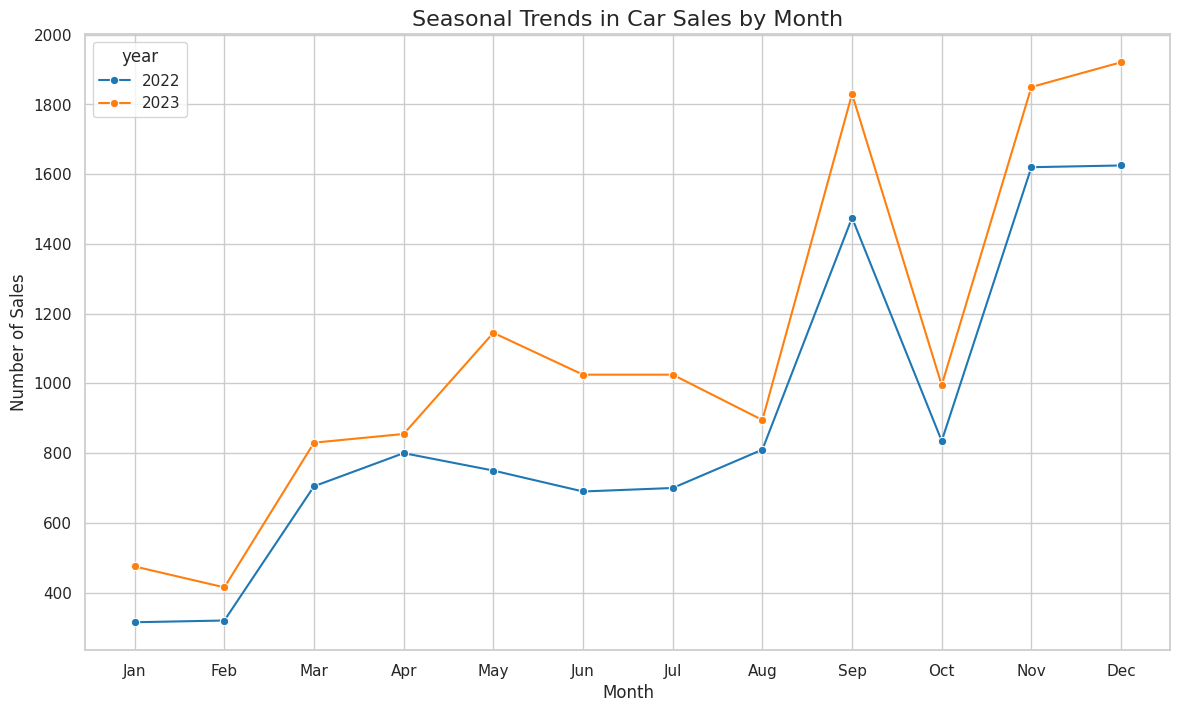

In [107]:
#Q12: Is there any seasonal trend in car sales based on the date of sale?
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


sales_by_month = df.groupby(['year', 'month']).size().reset_index(name='sales_count')


plt.figure(figsize=(14, 8))


sns.lineplot(x='month', y='sales_count', data=sales_by_month, hue='year', marker='o', palette='tab10')


plt.title('Seasonal Trends in Car Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

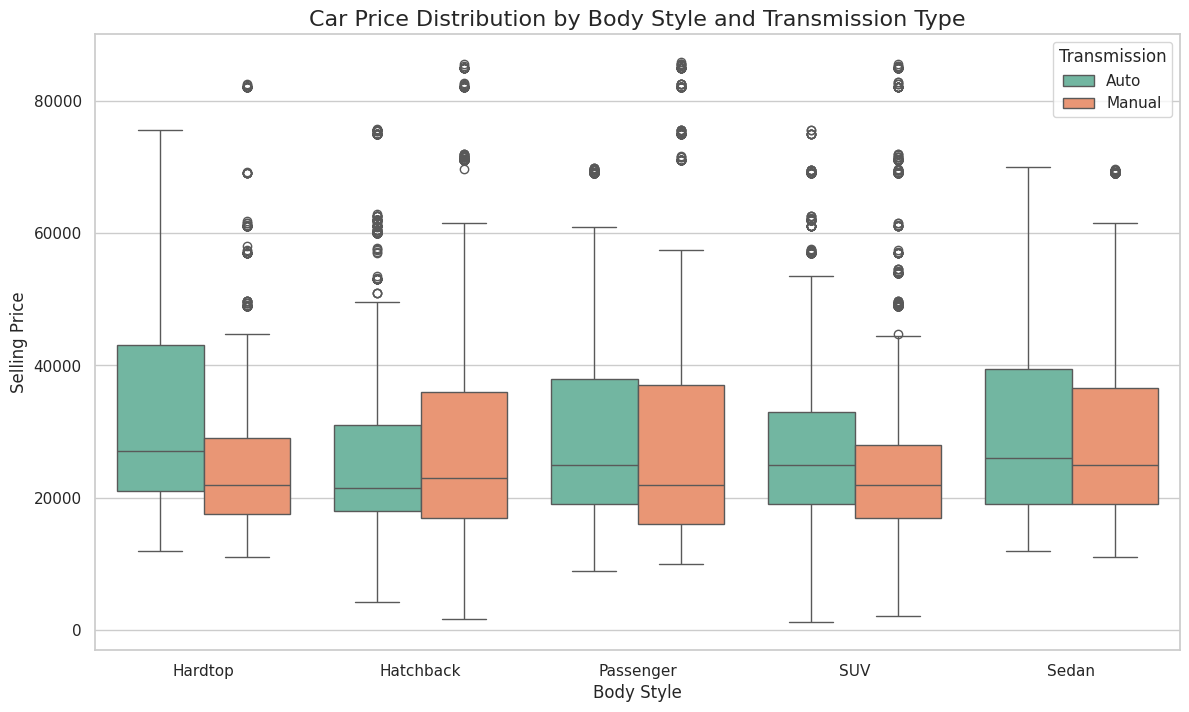

In [108]:
#Q13:How does the car price distribution change when considering different combinations of body style and transmission type?
df['Price ($)'] = pd.to_numeric(df['Price ($)'], errors='coerce')
df['Body Style'] = df['Body Style'].astype('category')
df['Transmission'] = df['Transmission'].astype('category')


plt.figure(figsize=(14, 8))


sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='Set2')

plt.title('Car Price Distribution by Body Style and Transmission Type', fontsize=16)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.show()

In [ ]:
#Q14: What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?



In [110]:
#Q15:How does the average car price vary across different car models and engine types?
verage_price = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
verage_price

Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1       3-Sep          Overhead Camshaft           NaN
2      3000GT  DoubleÂ Overhead Camshaft  22764.326923
3      3000GT          Overhead Camshaft  21770.659864
4        300M  DoubleÂ Overhead Camshaft  21394.888889
..        ...                        ...           ...
303  Windstar          Overhead Camshaft  17100.272727
304  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
305  Wrangler          Overhead Camshaft  18742.942029
306    Xterra  DoubleÂ Overhead Camshaft  15940.459459
307    Xterra          Overhead Camshaft  31072.500000

[308 rows x 3 columns]

##  EDA-3 Amazon Sales Data

In [151]:
df=pd.read_csv('amazon.csv')
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [133]:
#Q1:What is the average rating for each product category?

df['rating']=pd.to_numeric(df['rating'],errors='coerce')
df['category']=df['category'].astype('category')

average_rating=df.groupby('category')['rating'].mean().reset_index()
average_rating

category    rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...  3.800000
1    Computers&Accessories|Accessories&Peripherals|...  4.150000
2    Computers&Accessories|Accessories&Peripherals|...  3.500000
3    Computers&Accessories|Accessories&Peripherals|...  3.600000
4    Computers&Accessories|Accessories&Peripherals|...  4.050000
..                                                 ...       ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.250000
207  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.150000
208  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.300000
209  OfficeProducts|OfficePaperProducts|Paper|Stati...  4.133333
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...  4.300000

[211 rows x 2 columns]

In [141]:
#Q2: What are the top rating_count products by category?
df.columns
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
df['category'] = df['category'].astype('category')

top_rating=df.groupby(['category', 'product_name'])['rating'].count().reset_index()
top_rating

category  \
0       Car&Motorbike|CarAccessories|InteriorAccessori...   
1       Car&Motorbike|CarAccessories|InteriorAccessori...   
2       Car&Motorbike|CarAccessories|InteriorAccessori...   
3       Car&Motorbike|CarAccessories|InteriorAccessori...   
4       Car&Motorbike|CarAccessories|InteriorAccessori...   
...                                                   ...   
282102  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   
282103  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   
282104  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   
282105  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   
282106  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                             product_name  rating  
0       !!1000 Watt/2000-Watt Room Heater!! Fan Heater...       0  
1       !!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fa...       0  
2       10WeRun Id-116 Bluetooth Smartwatch Wireless F...       0  
3       10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...       0  
4       3M Post-it Sticky Note Cube, 200 Sheets (4 Col...       0  
...                                                   ...     ...  
282102  realme Buds Wireless in Ear Bluetooth Earphone...       0  
282103  realme narzo 50 (Speed Blue, 4GB RAM+64GB Stor...       0  
282104  realme narzo 50i (Mint Green, 2GB RAM+32GB Sto...       0  
282105  rts [2 Pack] Mini USB C Type C Adapter Plug, T...       0  
282106  tizum HDMI to VGA Adapter Cable 1080P for Proj...       0  

[282107 rows x 3 columns]

<Axes: xlabel='discounted_price', ylabel='actual_price'>

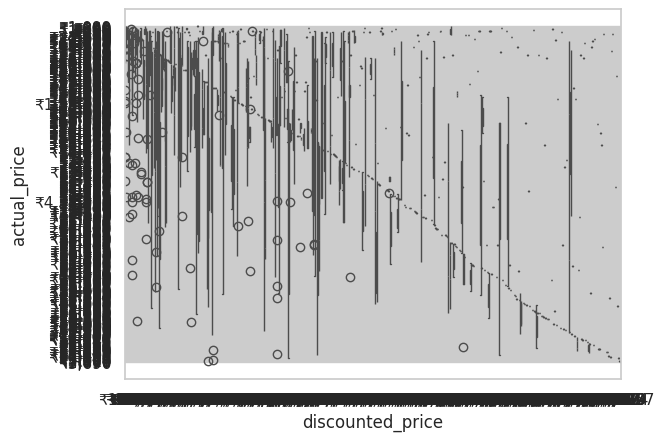

In [145]:
#Q3: What is the distribution of discounted prices vs. actual prices?
df.columns
sns.boxplot(x='discounted_price',y='actual_price',data=df)

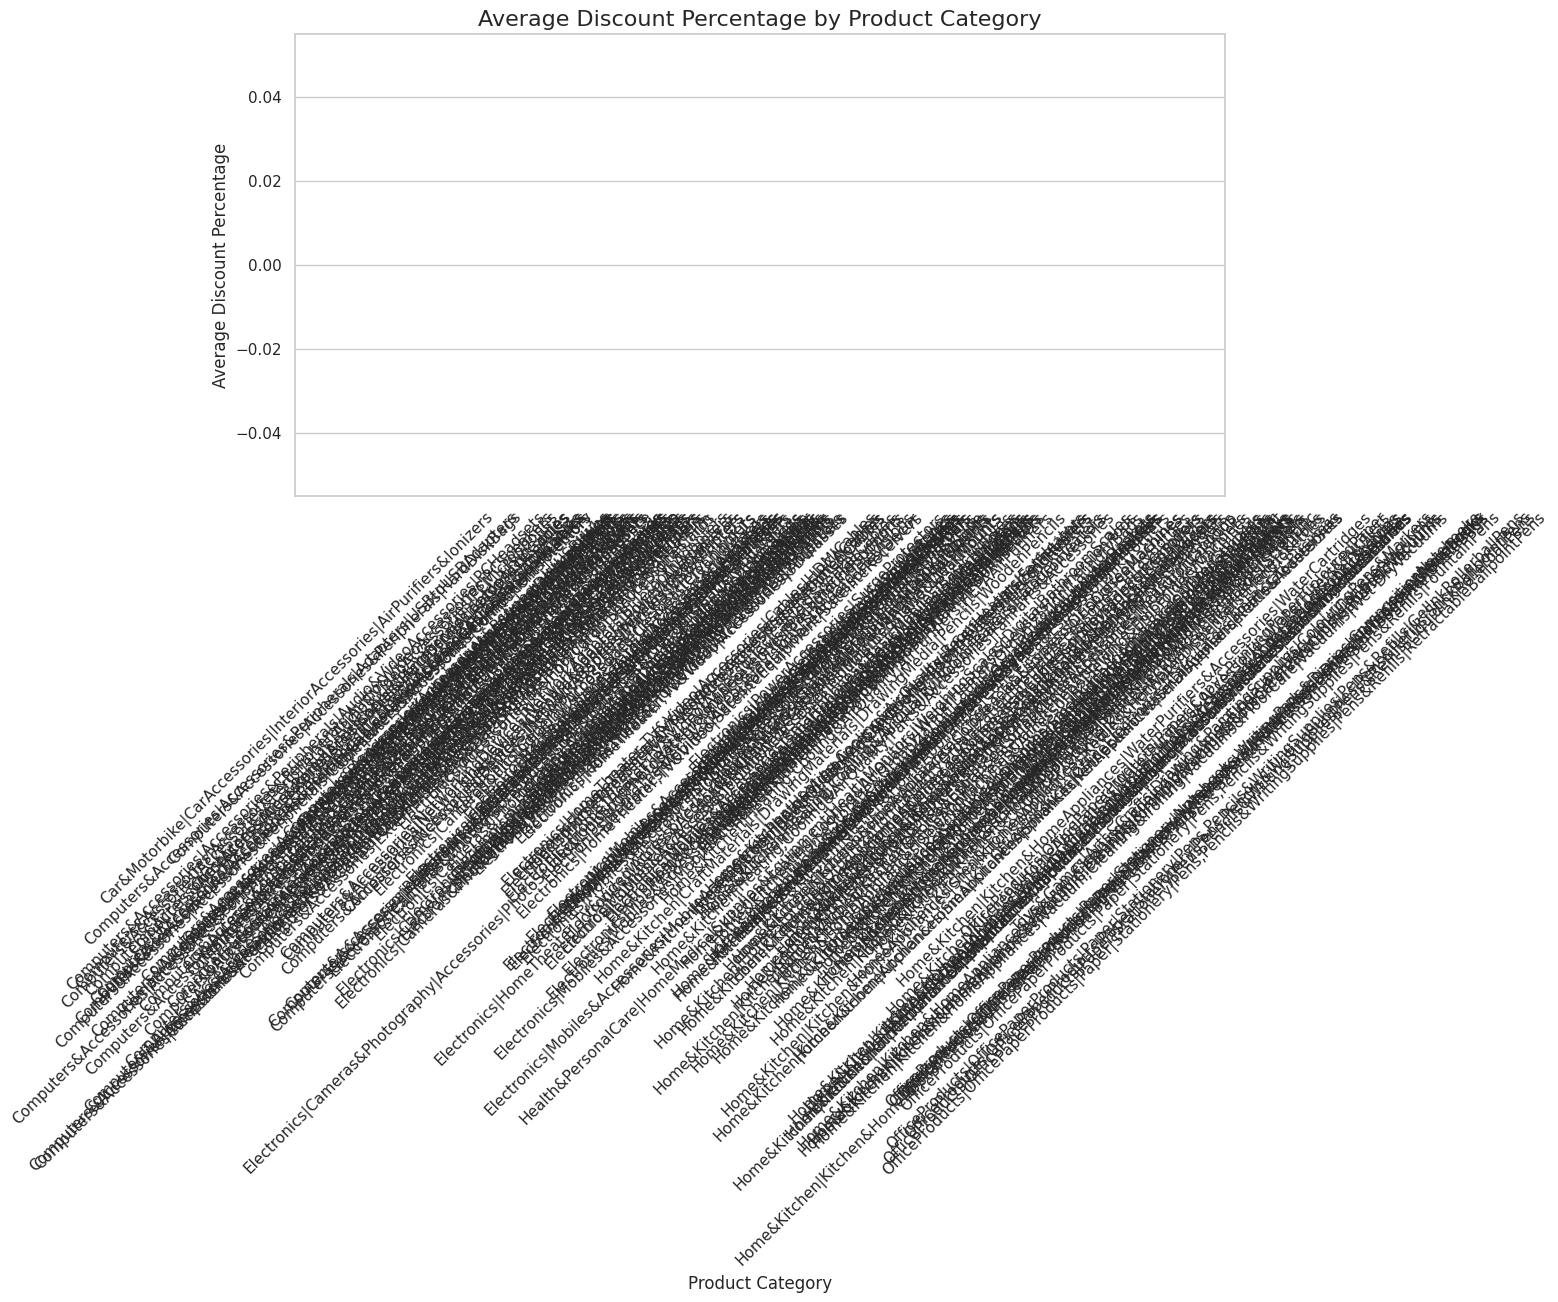

In [152]:
#Q4: How does the average discount percentage vary across categories?


df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['category'] = df['category'].astype('category')


df['discount_percentage'] = ((df['actual_price'] - df['discounted_price']) / df['actual_price']) * 100

avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().reset_index()


plt.figure(figsize=(12, 6))


sns.barplot(x='category', y='discount_percentage', data=avg_discount_by_category, palette='Set2')

plt.title('Average Discount Percentage by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Average Discount Percentage', fontsize=12)
plt.xticks(rotation=45)

plt.show()


In [154]:
#Q5:  What are the most popular product names?


df['product_name'] = df['product_name'].astype('category')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['product_name'] = df['product_name'].astype('str')


product_popularity = df.groupby('product_name')['rating'].count().reset_index()


product_popularity_sorted = product_popularity.sort_values('rating', ascending=False)


top_10_popular_products = product_popularity_sorted.head(10)


print(top_10_popular_products[['product_name', 'rating']])

                                          product_name  rating
384  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...       5
386  Fire-Boltt Phoenix Smart Watch with Bluetooth ...       4
118  Amazonbasics Nylon Braided Usb-C To Lightning ...       3
828  Portronics Konnect CL 20W POR-1067 Type-C to 8...       3
829  Portronics Konnect L 1.2M Fast Charging 3A 8 P...       3
390  Fire-Boltt Visionary 1.78" AMOLED Bluetooth Ca...       3
655  MI Braided USB Type-C Cable for Charging Adapt...       3
324  Duracell USB C To Lightning Apple Certified (M...       3
394        Flix Micro Usb Cable For Smartphone (Black)       3
834  Portronics Konnect L POR-1081 Fast Charging 3A...       3


In [ ]:
#Q6:  What are the most popular product keywords?


In [157]:
#Q7: What are the most popular product reviews?



df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df['review_title'] = df['review_title'].astype(str)


top_reviews_by_rating = df.sort_values(by='rating', ascending=False).head(10)


print("Top 10 Highest Rated Reviews:")
print(top_reviews_by_rating[['product_name', 'review_title', 'rating']])



Top 10 Highest Rated Reviews:
                                           product_name  \
174   Syncwire LTG to USB Cable for Fast Charging Co...   
324   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...   
775   Amazon Basics Wireless Mouse | 2.4 GHz Connect...   
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...   
1201  Oratech Coffee Frother electric, milk frother ...   
1145  Swiffer Instant Electric Water Heater Faucet T...   
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...   
1226  Zuvexa USB Rechargeable Electric Foam Maker - ...   
1275  Multifunctional 2 in 1 Electric Egg Boiling St...   
459   Spigen EZ Fit Tempered Glass Screen Protector ...   

                                           review_title  rating  
174   Good,Superb quality,Good products  nice one,Wo...     5.0  
324                                     Awesome Product     5.0  
775   Very responsive and stylish mouse,Simply Aweso...     5.0  
1299  Loved it,Good product,Good product,It's easy t... 

In [158]:
#Q8: What is the correlation between discounted_price and rating?
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

df = df.dropna(subset=['discounted_price', 'rating'])

correlation = df['discounted_price'].corr(df['rating'])

print(f"Correlation between discounted price and rating: {correlation}")


Correlation between discounted price and rating: nan


In [159]:
#Q9:  What are the Top 5 categories based on the highest rating?

df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])

category_avg_rating = df.groupby('category')['rating'].mean()

top_5_categories = category_avg_rating.sort_values(ascending=False).head(5)

print("Top 5 Categories Based on Highest Average Rating:")
print(top_5_categories)


Top 5 Categories Based on Highest Average Rating:
category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers               NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters              NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets      NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones   NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers      NaN
Name: rating, dtype: float64


In [ ]:
#Q10:  Identify any potential areas for improvement or optimization based on the data analysis.
##By focusing on areas such as pricing strategies, product quality, review management, inventory optimization, and customer segmentation, businesses can significantly improve their product offerings, customer satisfaction, and overall sales performance.

##The data analysis provides actionable insights into improving customer experience and optimizing sales, marketing, and product strategies. It also helps in targeting the right customers with the right products at the right time.

##EDA-4 Spotify Data: Popular Hip-hop Artists and Tracks

In [160]:
df=pd.read_csv("spotify.csv")

In [161]:
#Q1:Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

null_values = df.isnull().sum()
print("Null Values in Each Column:\n", null_values)

df_cleaned = df.dropna()

duplicates = df_cleaned.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicates}")

if duplicates > 0:
    df_cleaned = df_cleaned.drop_duplicates()
    print("Duplicate rows have been removed.")
else:
    print("No duplicate rows found.")

print("Cleaned DataFrame:")
print(df_cleaned.head())


Null Values in Each Column:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
Number of Duplicate Rows: 27
Duplicate rows have been removed.
Cleaned DataFrame:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


Null values in popularity column: 0


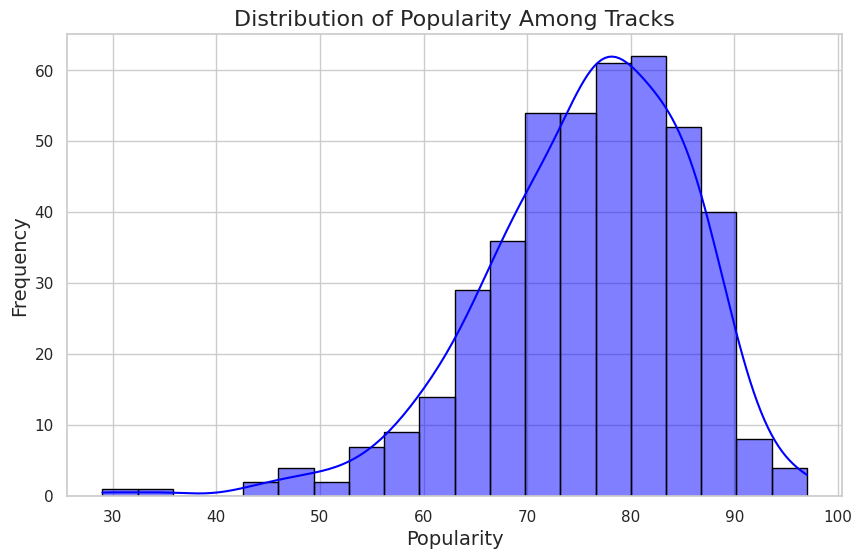

In [163]:
#Q2: What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

if 'Popularity' in df.columns:
    print(f"Null values in popularity column: {df['Popularity'].isnull().sum()}")

    df['Popularity'].fillna(df['Popularity'].median(), inplace=True)
else:
    print("No 'Popularity' column found in the dataset.")


plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='blue', edgecolor='black')


plt.title('Distribution of Popularity Among Tracks', fontsize=16)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()


Columns 'popularity' and 'duration_ms' found!


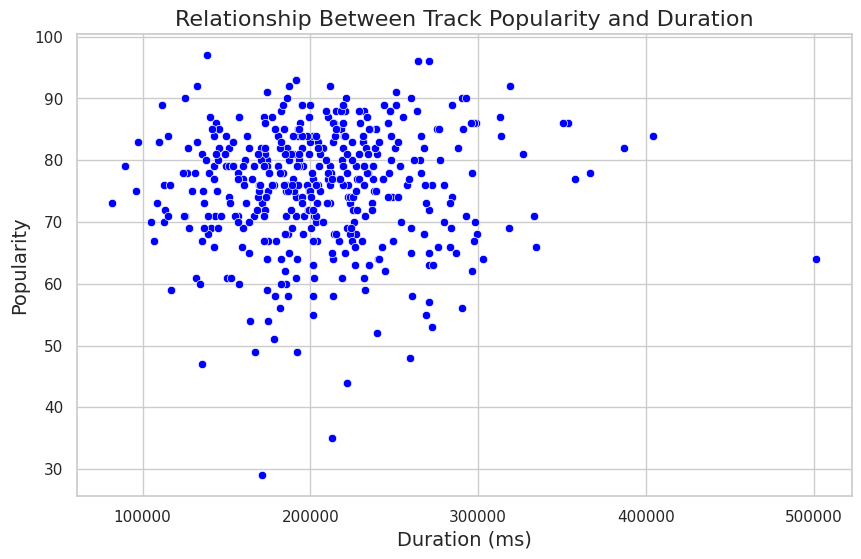

In [166]:
#Q3: Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
df.columns

if 'Popularity' in df.columns and 'Duration (ms)' in df.columns:
    print("Columns 'popularity' and 'duration_ms' found!")


    df['Popularity'].fillna(df['Popularity'].median(), inplace=True)
    df['Duration (ms)'].fillna(df['Duration (ms)'].median(), inplace=True)

else:
    print("Columns 'popularity' and 'duration_ms' not found in the dataset.")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df, color='blue')


plt.title('Relationship Between Track Popularity and Duration', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(True)

plt.show()

Number of tracks per artist:
artist with the highest number of tracks: Drake with 20 tracks.


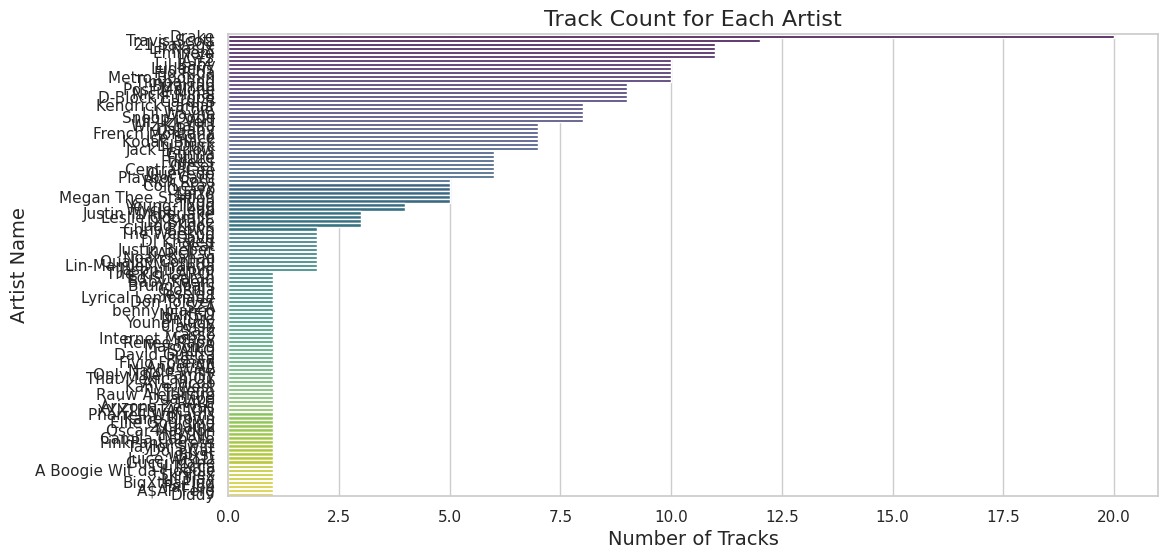

In [174]:
#Q4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

df.columns
if 'Artist' in df.columns:
    print(f"Number of tracks per artist:")


    artist_counts = df['Artist'].value_counts().reset_index()
    artist_counts.columns = ['Artist', 'Track Name']


    top_artist = artist_counts.iloc[0]
    print(f"artist with the highest number of tracks: {top_artist['Artist']} with {top_artist['Track Name']} tracks.")


    plt.figure(figsize=(12, 6))
    sns.countplot(y='Artist', data=df, order=df['Artist'].value_counts().index, palette='viridis')

    plt.title('Track Count for Each Artist', fontsize=16)
    plt.xlabel('Number of Tracks', fontsize=14)
    plt.ylabel('Artist Name', fontsize=14)
    plt.show()
else:
    print("No 'Artist' column found in the dataset.")


In [176]:
#Q5: What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?


if 'Popularity' in df.columns and 'Track Name' in df.columns and 'Artist' in df.columns:
    least_popular_tracks = df[['Track Name', 'Artist', 'Popularity']].sort_values(by='Popularity').head(5)

    print("Top 5 Least Popular Tracks:")
    print(least_popular_tracks)
else:
    print("The required columns ('Popularity', 'Track Name', 'Artist') are not found in the dataset.")


Top 5 Least Popular Tracks:
                        Track Name          Artist  Popularity
207  Attachments (feat. Coi Leray)          Pressa          29
231                     Intentions   Justin Bieber          35
413                Splash Brothers  French Montana          44
435                Splash Brothers  French Montana          44
225                  On Me - Remix        Lil Baby          47


In [184]:
#Q6: Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist
df.columns

if 'Popularity' in df.columns and 'Artist' in df.columns:
     artist_popularity_avg = df.groupby('Artist')['Popularity'].mean().reset_index()

     top_5_artists = artist_popularity_avg.sort_values(by='Popularity', ascending=False).head(5)
     print("Top 5 Artists with Highest Average Popularity:")
     print(top_5_artists)
else:
    print("The required columns ('popularity', 'Artist') are not found in the dataset.")


Top 5 Artists with Highest Average Popularity:
           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


In [185]:
#Q7: For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
if 'Popularity' in df.columns and 'Artist' in df.columns and 'Track Name' in df.columns:


    artist_popularity_avg = df.groupby('Artist')['Popularity'].mean().reset_index()


    top_5_artists = artist_popularity_avg.sort_values(by='Popularity', ascending=False).head(5)


    most_popular_tracks = []
    for artist in top_5_artists['Artist']:

        artist_tracks = df[df['Artist'] == artist]


        most_popular_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]


        most_popular_tracks.append({
            'Artist': artist,
            'Track Name': most_popular_track['Track Name'],
            'Popularity': most_popular_track['Popularity']
        })


    most_popular_tracks_df = pd.DataFrame(most_popular_tracks)


    print("Most Popular Tracks for Top 5 Most Popular Artists:")
    print(most_popular_tracks_df)

else:
    print("The required columns ('Popularity', 'Artist', 'Track Name') are not found in the dataset.")

Most Popular Tracks for Top 5 Most Popular Artists:
         Artist                    Track Name  Popularity
0         cassö                         Prada          92
1        Trueno  Mamichula - con Nicki Nicole          89
2  David Guetta            Baby Don't Hurt Me          87
3  Travis Scott    FE!N (feat. Playboi Carti)          93
4            ¥$                      CARNIVAL          96


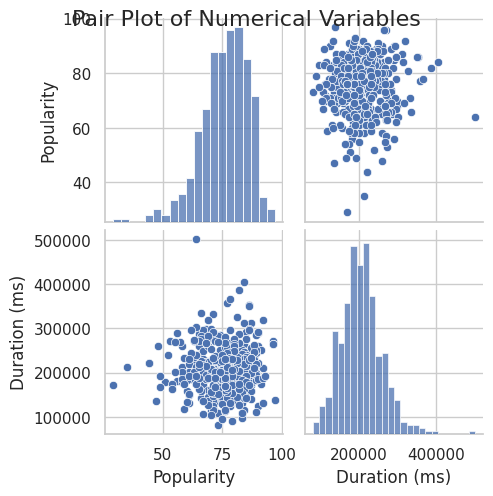

In [187]:
#Q8:Visualize relationships between multiple numerical variables simultaneously using a pair plot.

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', size=16)
plt.show()


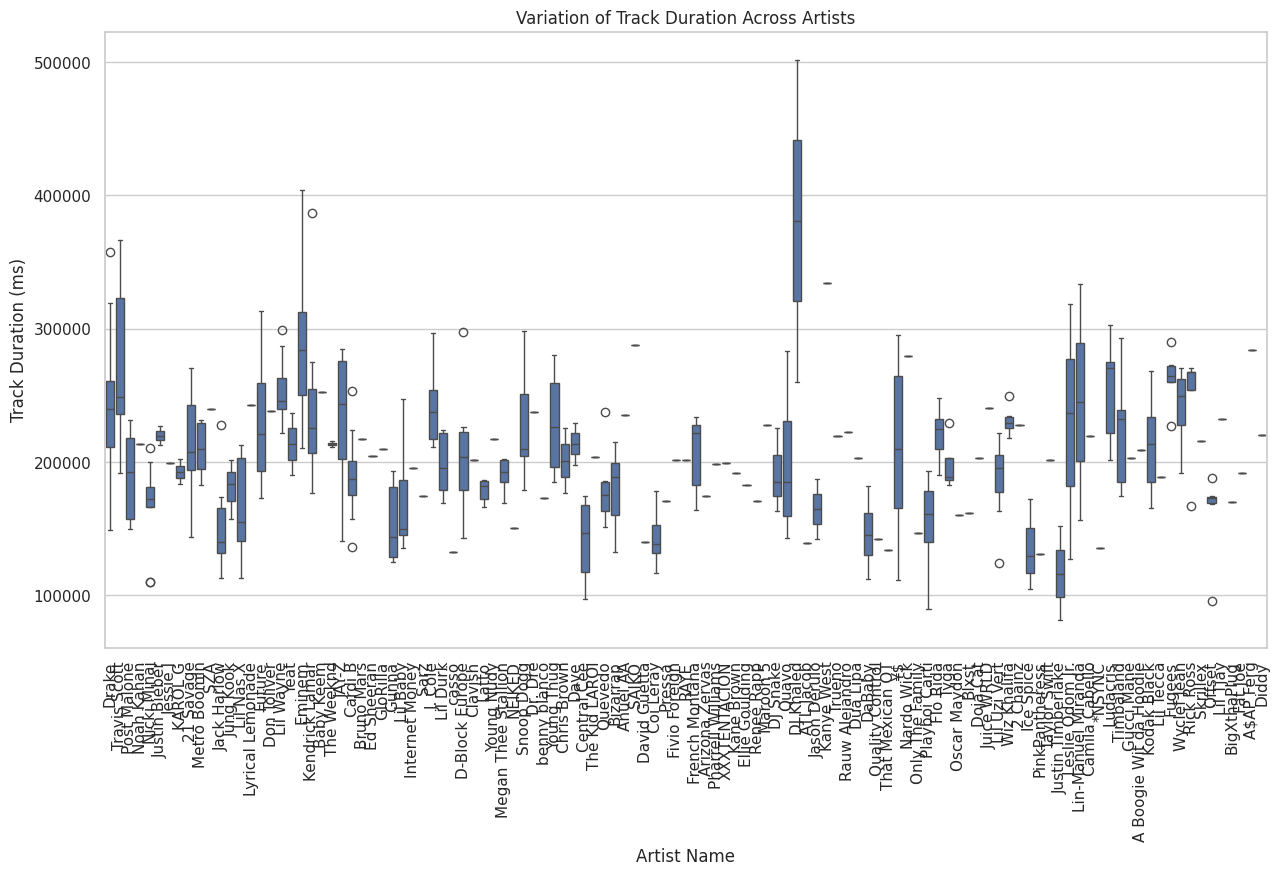

In [189]:
#Q9: Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

if 'Duration (ms)' in df.columns and 'Artist' in df.columns:


    plt.figure(figsize=(15, 8))
    sns.boxplot(x='Artist', y='Duration (ms)', data=df)


    plt.xticks(rotation=90)
    plt.title('Variation of Track Duration Across Artists')
    plt.xlabel('Artist Name')
    plt.ylabel('Track Duration (ms)')
    plt.show()
else:
    print("The required columns ('Duration (ms)', 'Artist') are not found in the dataset.")




In [188]:
df.columns


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

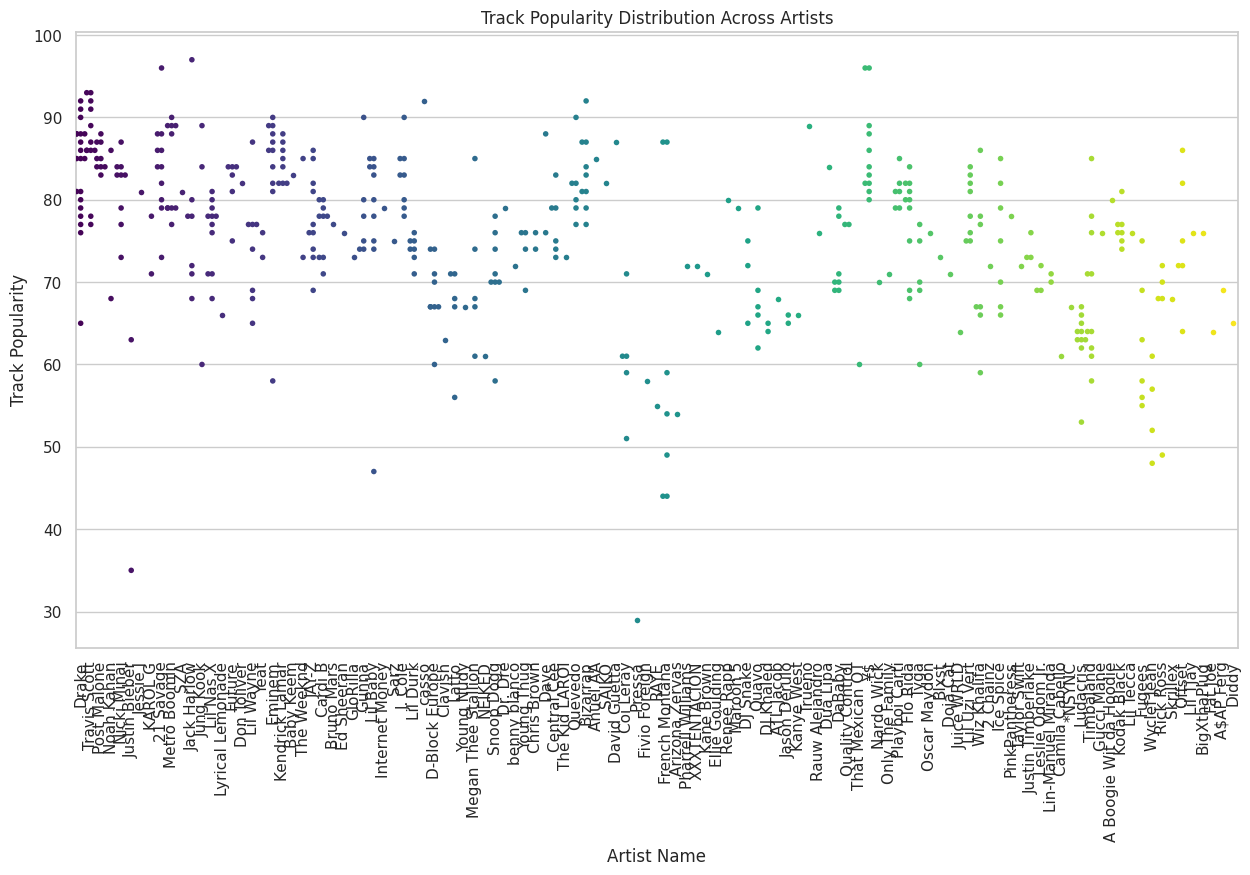

In [190]:
#Q10: How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

if 'Popularity' in df.columns and 'Artist' in df.columns:


    plt.figure(figsize=(15, 8))
    sns.swarmplot(x='Artist', y='Popularity', data=df, size=4, palette="viridis")


    plt.xticks(rotation=90)
    plt.title('Track Popularity Distribution Across Artists')
    plt.xlabel('Artist Name')
    plt.ylabel('Track Popularity')
    plt.show()
else:
    print("The required columns ('Popularity', 'Artist') are not found in the dataset.")

